# Prepare Dataset: Compute Stats and Normalize
> Compute dataset statistics, normalize and clean raw datasets and save them as new `.npy` pickle files

**For lab 1 dataset** (raw dataset is in `./sg_temps`)
1. Compute dataset stats and write it to __`sg_temps_stats.csv`__.
    - Read/import it as `pd.read_csv('./sg_temps_stats.csv',header=0,index_col=0)`
1. Normalize raw dataset with given mean/median and scale.
    - For lab 1, use `mean=28`, and scale it with `2xS.D. = 1.6`.
1. Save normalized datasets as `./train_norm.npy` and `./test_norm.npy`
    - You can later load them with numpy, e.g.
    ```python
    with open('train_norm.npy', 'rb') as f:
        train_norm = np.load(f)
    ```

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Dataset stats
- to be used later to normalize the data

### Import data

In [ ]:
train_raw = pd.read_csv('./sg_temps/train.csv',header=None)[0].values
test_raw = pd.read_csv('./sg_temps/test.csv',header=None)[0].values

### Stat-s for datasets:
- compute stat-s and write them to `./sg_temps_stats.csv`

In [ ]:
data_stats = {}
data_stats['Train'] = [train_raw.min(), train_raw.max(),
                       train_raw.mean(), np.median(train_raw),
                       train_raw.std(), train_raw.max() - train_raw.min()]
data_stats['Test'] = [test_raw.min(), test_raw.max(),
                       test_raw.mean(), np.median(test_raw),
                       test_raw.std(), test_raw.max() - test_raw.min()]
indx = ['min','max','mean','median','std','range']

# write to file
data_stats_df  = pd.DataFrame(data=data_stats,index=indx)
data_stats_df.to_csv('./sg_temps_stats.csv',
                     header=True,index=True)

print('Dataset statistics:')
data_stats_df

Dataset statistics:


,Train,Test
min,25.192857,26.842857
max,30.064286,29.907143
mean,27.470527,28.265688
median,27.478571,28.191071
std,0.816063,0.718030
range,4.871429,3.064286


### Histograms:

In [ ]:
# Number of bins:
N_bins = 50
# histogram range:
x_range = [min(data_stats_df.loc['min']),max(data_stats_df.loc['max'])]
hist_bins = np.linspace(x_range[0],x_range[1],N_bins)

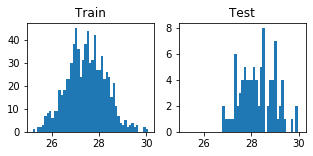

In [ ]:
_, axs = plt.subplots(nrows=1,ncols=2,figsize=[5,2],sharex=True,squeeze=True)
# Train
axs[0].hist(train_raw, bins=hist_bins)
axs[0].set_title('Train')

# Test
axs[1].hist(test_raw, bins=hist_bins)
axs[1].set_title('Test')

plt.show()

## Normalize

Generally, we would use the stat-s computed above for the training data to normalize our data. But for consistency we will use the same procedure as in the **lab 1** (With approx. `mean`:28, `2x s.d.`:1.6).
$$x_{normalized} = \frac{x_{raw}-28}{1.6}$$

### Normalize and Write Updated Datasets to New Files
- Normalize

In [ ]:
x_mean = 28.0
x_scale = 1.6
train_norm = (train_raw - x_mean)/x_scale
test_norm = (test_raw - x_mean)/x_scale

- Write arrays to `./train_norm.npy` and `./test_norm.npy`

In [ ]:
# normalized training dataset:
with open('train_norm.npy', 'wb') as f:
    np.save(f, train_norm)

# normalized test dataset:
with open('test_norm.npy', 'wb') as f:
    np.save(f, test_norm)
    
# # For loading them back use:
# # with open('train_norm.npy', 'rb') as f:
# #    x_test = np.load(f)

---
Plot normalized data:

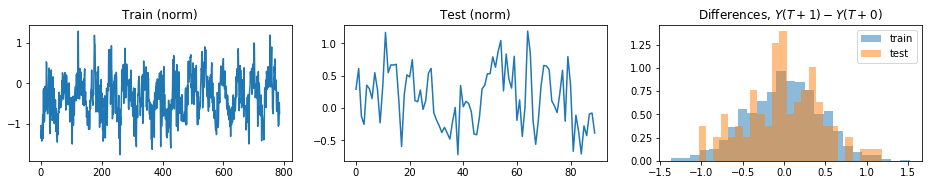

In [ ]:
_,axs = plt.subplots(ncols=3,nrows=1,figsize=[16,2.5],squeeze=True)
# Plot time series
axs[0].plot(train_norm)
axs[0].set_title('Train (norm)')
axs[1].plot(test_norm)
axs[1].set_title('Test (norm)')
# deltaY: differences Y(t+1)-Y(t)
axs[2].hist((train_norm[1:]-train_norm[:-1]),bins=25,density=True,alpha=.5,label='train')
axs[2].hist(test_norm[1:]-test_norm[:-1],bins=25,density=True,alpha=.5,label='test')
plt.title('Differences, $Y(T+1)-Y(T+0)$')
plt.legend()
plt.show()

---
From session 5 video: SG-Temps dataset
- Daily temperatures 2000-2015
- Strong yearly cycles ( _of different and varying lengths_ ) driven by monssons
- Maxima more regular than minima
- Max/Min temps show inter-annual variation
---

### Persistence Loss (for Normalized Data with MSE loss)

- note that session 5 uses MSE loss and an additional factor of 0.5x for persistence loss ([_see video_](https://youtu.be/TSHc60ZI7cU?t=268))
- here we ignore 0.5x
---
Compute persistence loss and save it to `./persistence_T{}.npy` where `{}` is replaced by the lead time, e.g. `./persistence_T5.npy`.
- You can load it back with the code below:
```python
with open('persistence_T5.npy','rb') as f:
    x=np.load(f,allow_pickle=True).item()
```
`x` is a python `dict` object.
- Here, `persistence` is computed starting from the first elements of `train_norm` (or `test_norm`). Your exact training/testing dataset will start from the last element in the window, which will be set as first $Y(T+0)$.

In [ ]:
import utils

In [ ]:
Tlead = 5
# utils.persistence_loss by default uses MSE as metric
persistence_data = np.array({'lead_time':Tlead,
                             'persist_train':utils.persistence_loss(train_norm,lead_time=Tlead),
                             'persist_test':utils.persistence_loss(test_norm,lead_time=Tlead)})

with open('persistence_T{}.npy'.format(Tlead), 'wb') as f:
    np.save(f,persistence_data)

print(persistence_data)

{'lead_time': 5, 'persist_train': 0.3465510886796467, 'persist_test': 0.3377655358064947}
